/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


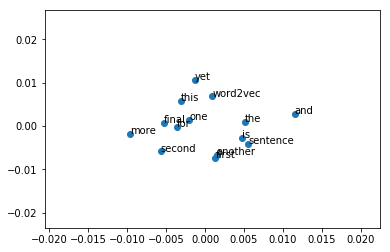

In [31]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [32]:
import os
import shutil
import smart_open
from sys import platform

import gensim


def prepend_line(infile, outfile, line):
	""" 
	Function use to prepend lines using bash utilities in Linux. 
	(source: http://stackoverflow.com/a/10850588/610569)
	"""
	with open(infile, 'r') as old:
		with open(outfile, 'w') as new:
			new.write(str(line) + "\n")
			shutil.copyfileobj(old, new)

def prepend_slow(infile, outfile, line):
	"""
	Slower way to prepend the line by re-creating the inputfile.
	"""
	with open(infile, 'r') as fin:
		with open(outfile, 'w') as fout:
			fout.write(line + "\n")
			for line in fin:
				fout.write(line)

def get_lines(glove_file_name):
    """Return the number of vectors and dimensions in a file in GloVe format."""
    with smart_open.smart_open(glove_file_name, 'r') as f:
        num_lines = sum(1 for line in f)
    with smart_open.smart_open(glove_file_name, 'r') as f:
        num_dims = len(f.readline().split()) - 1
    return num_lines, num_dims
	
# Input: GloVe Model File
# More models can be downloaded from http://nlp.stanford.edu/projects/glove/
glove_file="glove.6B.300d.txt"

num_lines, dims = get_lines(glove_file)

# Output: Gensim Model text format.
gensim_file='glove_model2.txt'
gensim_first_line = "{} {}".format(num_lines, dims)

# Prepends the line.
if platform == "linux" or platform == "linux2":
	prepend_line(glove_file, gensim_file, gensim_first_line)
else:
	prepend_slow(glove_file, gensim_file, gensim_first_line)

# Demo: Loads the newly created glove_model.txt into gensim API.
model1=gensim.models.KeyedVectors.load_word2vec_format(gensim_file,binary=False) #GloVe Model

# print model.most_similar(positive=['australia'], topn=10)
# print model.similarity('woman', 'man')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


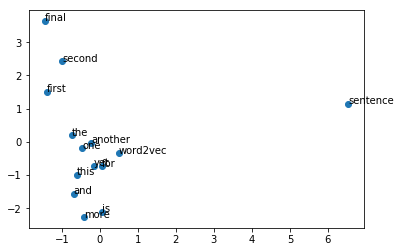

In [36]:
from gensim.models import KeyedVectors

model_2 = Word2Vec(size=300, min_count=1)
model_2.build_vocab(sentences)
total_examples = model_2.corpus_count
# model = KeyedVectors.load_word2vec_format("glove.6B.300d.txt", binary=False)
model_2.build_vocab([list(model1.vocab.keys())], update=True)
model_2.intersect_word2vec_format(gensim_file, binary=False, lockf=1.0)
model_2.train(sentences, total_examples=total_examples, epochs=model_2.iter)

# fit a 2d PCA model to the vectors
X = model_2[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()